In [3]:
import pandas as pd 
from datasets import load_dataset 
import matplotlib.pyplot as plt
import ast
import seaborn as sns
# load data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# data cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [6]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset = ['salary_year_avg'])

In [7]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [8]:
df_US_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [17]:
job_order = df_US_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending = False).index

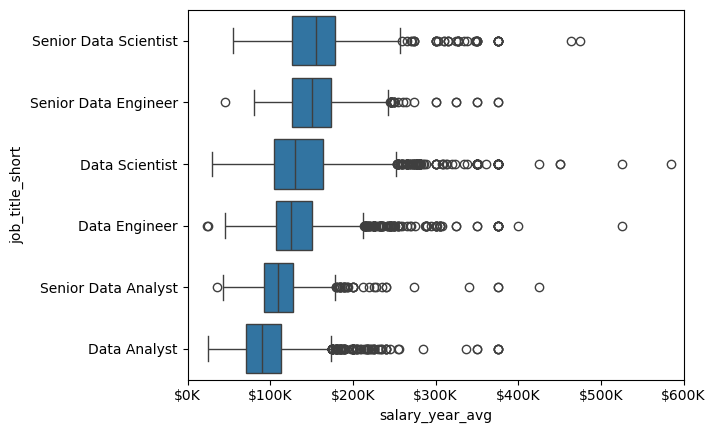

In [18]:
sns.boxplot(data=df_US_top6, x= 'salary_year_avg', y ='job_title_short', order = job_order)

#plt.boxplot(job_list, labels = job_titles, vert = False)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'${int(y/1000)}K'))
plt.xlim(0,600000)
plt.show()

In [21]:
# investigate median salary vs skill for data analyst 

df_DA_US = df[(df['job_title_short']== 'Data Analyst') & (df['job_country']== 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [26]:
df_DA_US = df_DA_US.explode('job_skills')
df_top_pay = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='median', ascending = False)
df_top_pay = df_top_pay.head(10)
df_top_pay

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [30]:
df_top_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count', ascending = False)
df_top_skills = df_top_skills.head(10).sort_values(by='median',ascending = False)
df_top_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


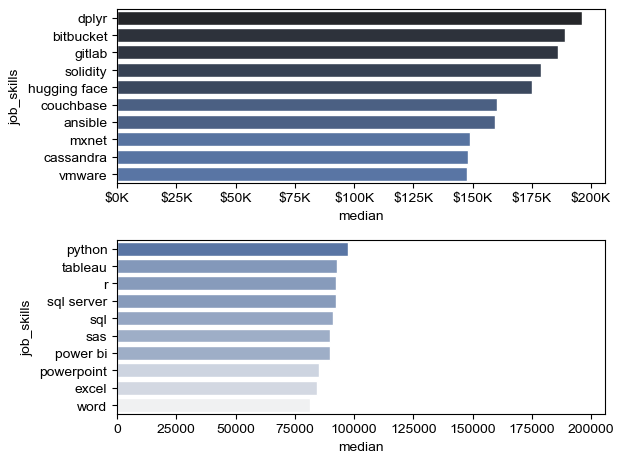

In [31]:
fig, ax = plt.subplots(2,1)

sns.set_theme(style='ticks') 


#df_top_pay[::-1].plot(kind = 'barh', y= 'median', ax = ax[0],legend = False)
sns.barplot(data = df_top_pay, x = 'median', y = df_top_pay.index, ax = ax[0], hue= 'median', palette= 'dark:b_r') # _r to reverse color 
ax[0].legend().remove()

ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

#df_top_skills[::-1].plot(kind='barh', y = 'median', ax = ax[1],legend = False)

sns.barplot(data = df_top_skills, x = 'median', y = df_top_skills.index, ax = ax[1], hue= 'median', palette = 'light:b')
ax[1].legend().remove()


ax[1].set_xlim(ax[0].get_xlim())

fig.tight_layout()